---
# <center><font color = "DarkSlateGray">*Seoul Bike Data:*</font><center>
---

## <left><font color = "DarkSlateGray">*1. Introduction:*</font><left>

*<left><font color="DarkSlateGray">1.1 - Background:</font><left>*

Bike-sharing systems have emerged as a cruical component of sustinable ubran mobility, offering an eco-friendly and cost-effective alternative to traditional transportation. Seoul, the captial of South Korea, has implemented its public bike-sharing program, **Ddareungi**, to promote environmental sustainability and reduce traffic congestion. With the increasing popularity of bike-sharing, **predicting demand patterns** is essential for ensuring optimal bike distribution, reducing operational inefficiencies, and improving user satisfaction. 

Accurately forecasting bike demand is a complex challenge influenced by multiple factors, including **weather conditions, seasonal trends, time of day, and urban mobility patterns**. Traditional statistical methods struggle to capture the **nonlinear dependencies** present in these variables, making **machine learning and deep learning techniques, particularly Neural Networks, a powerful tool for demand prediction**. 

*<left><font color="DarkSlateGray">1.2 - Problem Statement:</font><left>*

Seoul's bike-sharing system faces operational challenges due to unpredictable demand fluctuations. **Inaccurate demand foorecasts lead to inefficiencies**, such as bike shortages in high-traffic areas or surplus bikes in low-demand zones. This results in **longer wait times, reduced accessibility, and increased operational costs** for bike redistribution. 

The objective of this study is to develop a **Neural Network-based demand predicition model** that leverages **Big Data Processing** techniques. By integrating **Deep Learning models (e.g. LSTM)** with **Big Data frameworks (e.g. Apache Spark)**, this research aims to provide an **efficient, scalable, and accurate** forecasting solution for Seoul's bike-sharing system. 

- Seoul's bike-sharing system has large variations in demand due to factors like weather, seasonality, and time of the day.
- The goal is to **predict daily bike demand** using **deep learning models** while leveraging **big data processing**. 

*<left><font color="DarkSlateGray">1.3 - Research Questions:</font><left>*

This study aims to:
- **Analyse Seoul's bike-sharing demand trends** using historical data and exploratory data analysis (EDA).
- **Develop a deep learning-based forecasting model** using **Long Short-Term Memory (LSTM) networks** to predict daily bike rentals.
- **Implement Big Data Processing techniques** (Apache Spark) to efficiently handle and scale large datasets.
- **Evaluate model performance** against traditional predicitive models using metrics like **Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-Squared (R^2)**.
- **Provide actionable insights** to help transportation authorities optimaise bike availability and allocation. 

*<left><font color="DarkSlateGray">1.4 - Significance of the Study:</font><left>*

- **Urban Mobility Enhancement:** Accurate demand forecasting helps city planners **optimise bike placement** and **reduce shortages** in high-traffic areas.
- **Big Data & AI Intgration:** This study demonstrates the effectiveness of **Neural Networks and Big Data Processing** in real-world applications.
- **Sustainability & Green Transport:** Efficient bike-sharing systems contribute to **reduced carbon emissions** and **improved urban sustainability**.

This research will contribute to the field of **transportation analytics** by showcasing **how AI-driven demand forecasting, coupled with Big Data storage and processing techniques, can improve public bike-sharing systems**. 

*<left><font color="DarkSlateGray">1.5 - Business Objectives:</font><left>*

- Improve bike availbilty by predicting demand.
- Optimise logistics and resource allocation for bike distribution.
- Implement scalable big data solutions. 

*<left><font color="DarkSlateGray">1.6 - Loading the Required Libraries:</font><left>*

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
#from tensorflow import keras
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pyspark.sql.functions as F
from pyspark.sql import SparkSession

## <left><font color = "DarkSlateGray">*2. Data Loading & Understanding the Data:*</font><left>

*<left><font color="DarkSlateGray">2.1 - Loading the Dataset:</font><left>*

In [4]:
# Loading the dataset
# When trying to load the dataset. I kept getting an error. To overcome this I used ISO-8859-1 encoding 
# It is used as an alternative to prevent Unicode errors when reading files with special characters.
df = pd.read_csv("SeoulBikeData.csv", encoding='ISO-8859-1')

# Displaying the first 5 rows of the dataset - to ensure a sucessful loading
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


*<left><font color="DarkSlateGray">2.2 - Dataset Information:</font><left>*

In [6]:
# Printing the number of rows and columns in the dataset
# [0] for rows and [1] for columns in the dataset
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset")

There are 8760 rows and 14 columns in this dataset


*<left><font color="DarkSlateGray">2.3 - Dataset Dictionary:</font><left>*

In [8]:
# Inspecting the column names that are within the dataset 
# Using the column manes to create a data dictionary 
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
data = [
    ["Date", "day-month-year."],
    ["Rented Bike Count", "Count of bikes rented at each hour."],
    ["Hour", "Hour of the day."],
    ["Temperature(°C)", "Temperature in Celsius."],
    ["Humidity(%)", "Humidity %."],
    ["Wind speed (m/s)", "measured in m/s."],
    ["Visibility (10m)", "measured in m."],
    ["Dew point temperature(°C)", "measured in Celsius."],
    ["Solar Radiation (MJ/m2)", "measured in mJ/m2."],
    ["Rainfall(mm)", "Rainfail measured in mm."],
    ["Snowfall (cm)", "Snowfall measured in cm."],
    ["Seasons", "Winter, Spring, Summer, Autumn."],
    ["Holiday", "Holiday/No Holiday."],
    ["Functioning Day", "NoFunc(Non Functional Hours), Fun(Functional hours)."],
]

# Creating the table
table = tabulate(data, headers=["Column Name","Description of Variable"], tablefmt="grid")

# Print the table
print(table)

+---------------------------+------------------------------------------------------+
| Column Name               | Description of Variable                              |
+===========================+======================================================+
| Date                      | day-month-year.                                      |
+---------------------------+------------------------------------------------------+
| Rented Bike Count         | Count of bikes rented at each hour.                  |
+---------------------------+------------------------------------------------------+
| Hour                      | Hour of the day.                                     |
+---------------------------+------------------------------------------------------+
| Temperature(°C)           | Temperature in Celsius.                              |
+---------------------------+------------------------------------------------------+
| Humidity(%)               | Humidity %.                        

*<left><font color="DarkSlateGray">2.4 - Statistics Summary:</font><left>*

In [11]:
# Provides summary statistics for numerical columns in the DF
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


*<left><font color="DarkSlateGray">2.5 - Correlation Heatmap:</font><left>*

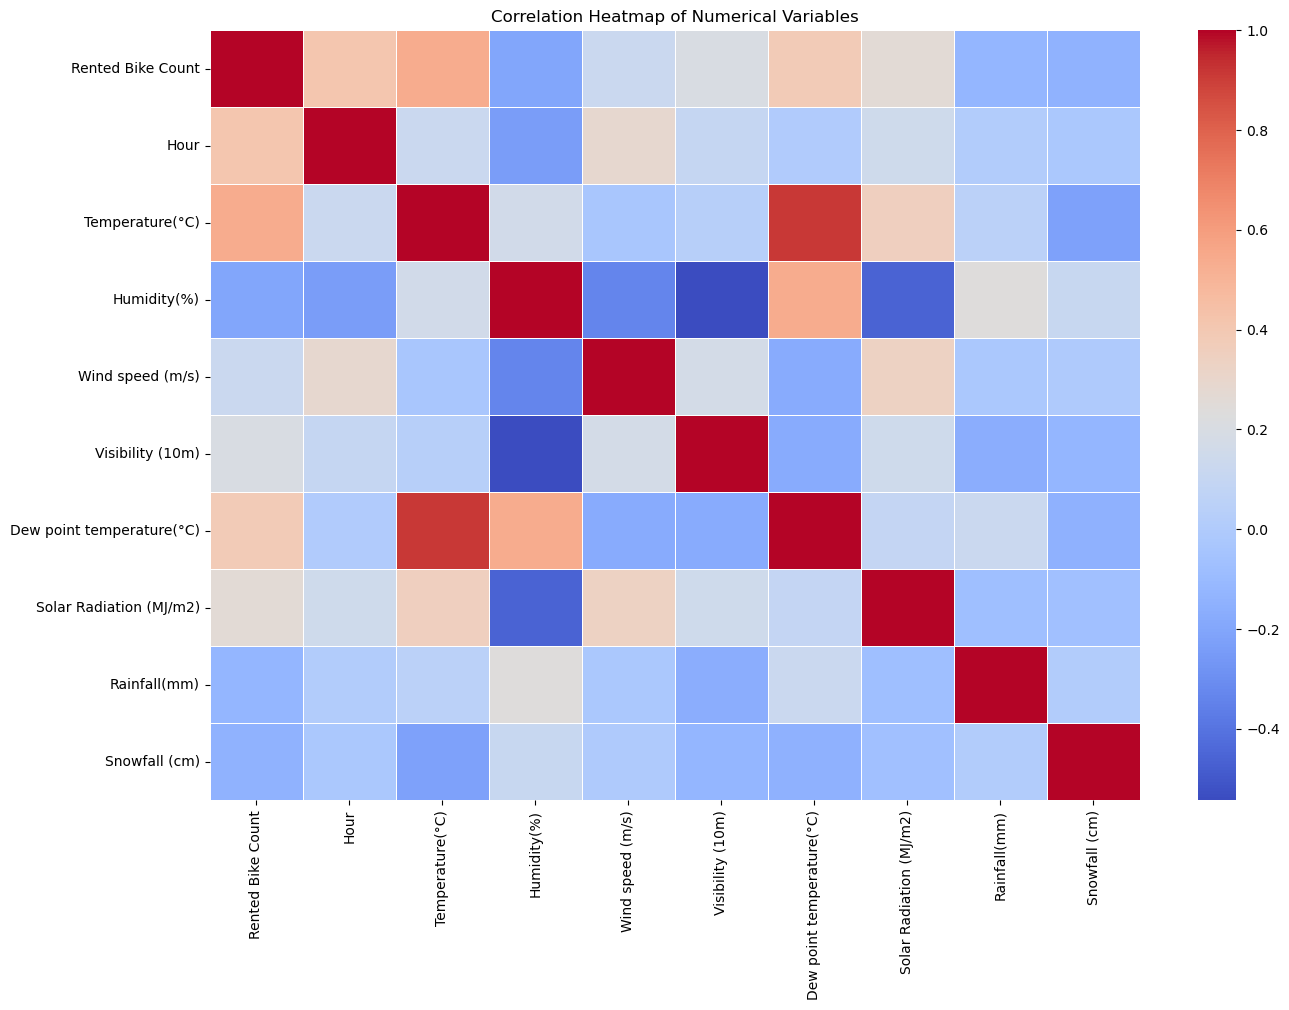

In [13]:
# Select only numeric columns for the correlation
# ensures that only numerical data is used for the correlation, preventing errors
numeric_df = df.select_dtypes(include=['number'])

# Generating the heatmap
# Using the 'coolwarm' palette, will help identify pos or neg relationships
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

*<left><font color="DarkSlateGray">2.6 - Investigating if any Duplicates exist within the Dataset:</font><left>*

In [15]:
# Returns the total number of duplicated rows that are within the df
df.duplicated().sum()

0

*<left><font color="DarkSlateGray">2.7 - Investigating if there are any missing values within the Dataset:</font><left>*

<Axes: >

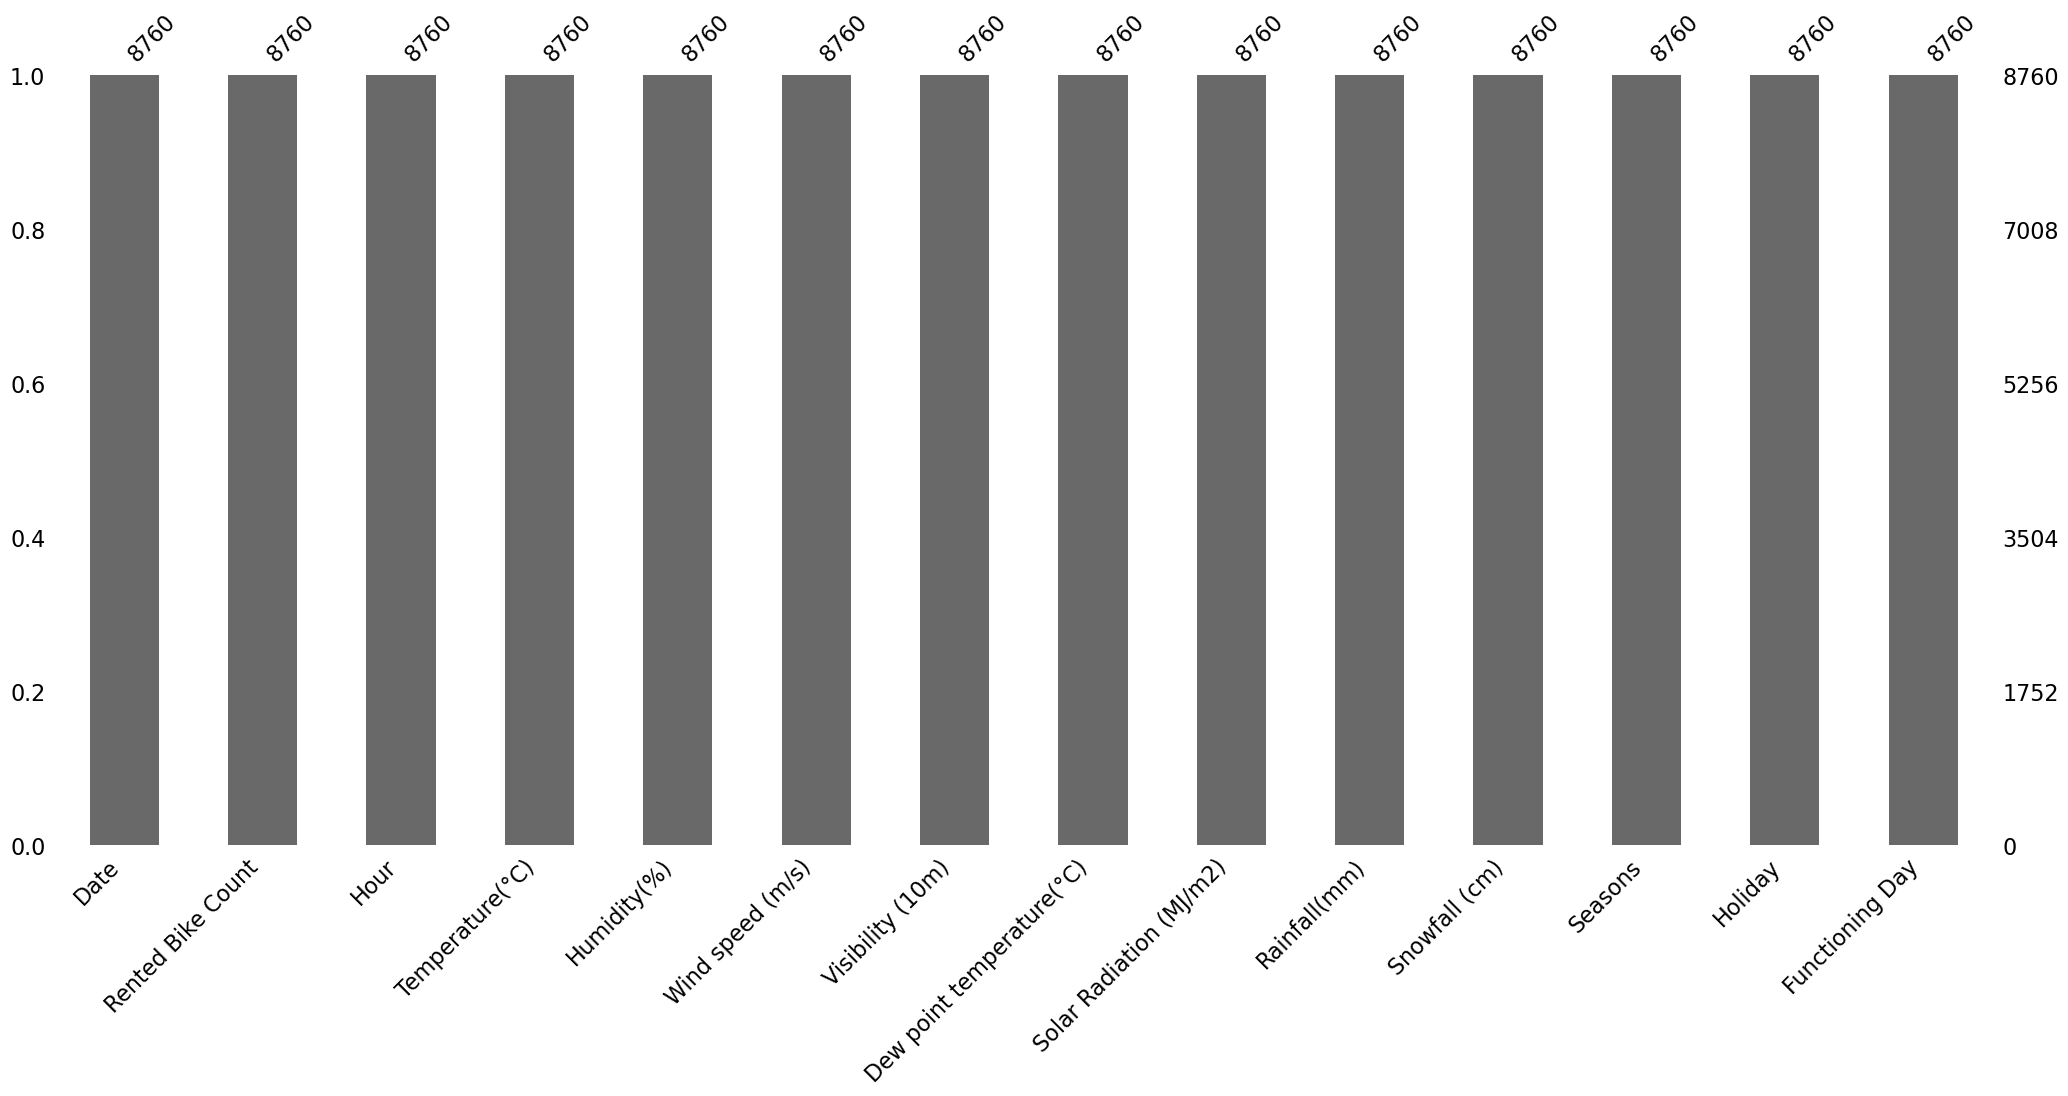

In [17]:
# Generates a bar chart visual that shows the count of non-missing values for each column
msno.bar(df)

*<left><font color="DarkSlateGray">2.8 - Section Conclusion:</font><left>*

- X
- X
- X

## <left><font color = "DarkSlateGray">*3. Data Pre-processing:*</font><left>

*<left><font color="DarkSlateGray">3.1 - Handling Data Types:</font><left>*

In [22]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract date components
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df['Is_Weekend'] = df['Weekday'].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

# Confirm the data type conversion
print(df.dtypes)

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
Month                                 int32
Day                                   int32
Weekday                               int32
Is_Weekend                           object
dtype: object


*<left><font color="DarkSlateGray">3.2 - Creating New Columns:</font><left>*

In [24]:
# Creating 'Part of the Day' Column 
def categorise_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Applying the function to create the new column 
df['Part of the Day'] = df['Hour'].apply(categorise_time)

In [25]:
# Creating Peak Hour Indicator Column
df['Peak Hour'] = df['Hour'].apply(lambda x: "Peak" if (7 <= x <= 9) or (17 <= x <= 19) else "Non-Peak")

In [26]:
# Creating Weather Condition
def weather_category (temp, wind, rain, solar):
    if temp < 0:
        return "Freezing"
    elif rain > 10 or wind > 7:
        return "Stormy"
    elif solar > 2:
        return "Sunny"
    else:
        return "Normal"

df['Weather Condition'] = df.apply(lambda x: weather_category(x['Temperature(°C)'], x['Wind speed (m/s)'],
                                                              x['Rainfall(mm)'], x['Solar Radiation (MJ/m2)']), axis=1)

In [27]:
# Creating Daylight condition
def is_daylight(hour, month):
    if (3 <= month <= 9 and 6 <= hour <= 20): # March-Sep: More Daylight
        return "Daylight"
    elif (month < 3 or month > 9) and (7 <= hour <= 18): # Oct - Feb: Less Daylight
        return "Daylight"
    else:
        return "Nighttime"

df['Daylight'] = df.apply(lambda x: is_daylight(x['Hour'], x['Month']), axis=1)

In [28]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Holiday,Functioning Day,Month,Day,Weekday,Is_Weekend,Part of the Day,Peak Hour,Weather Condition,Daylight
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,No Holiday,Yes,12,1,4,Weekday,Night,Non-Peak,Freezing,Nighttime
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,No Holiday,Yes,12,1,4,Weekday,Night,Non-Peak,Freezing,Nighttime
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,No Holiday,Yes,12,1,4,Weekday,Night,Non-Peak,Freezing,Nighttime
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,No Holiday,Yes,12,1,4,Weekday,Night,Non-Peak,Freezing,Nighttime
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,No Holiday,Yes,12,1,4,Weekday,Night,Non-Peak,Freezing,Nighttime


*<left><font color="DarkSlateGray">3.3 - Handling Outliders:</font><left>*

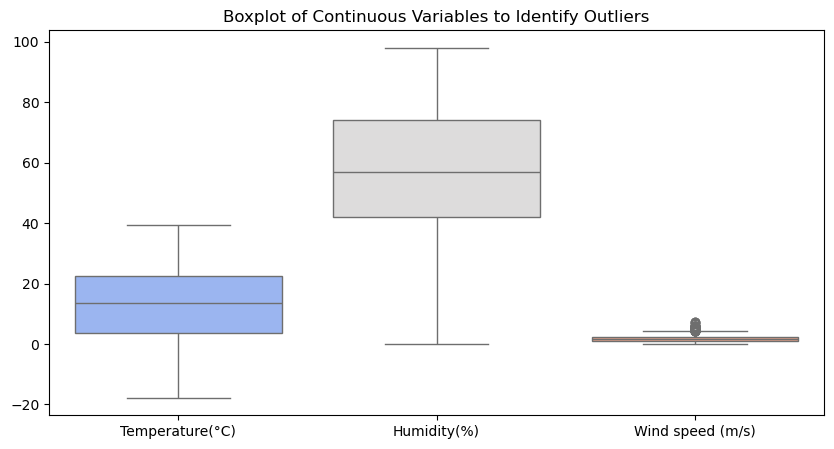

In [48]:
# Boxplot to visualise outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)']], palette="coolwarm")
plt.title("Boxplot of Continuous Variables to Identify Outliers")
plt.show()

## <left><font color = "DarkSlateGray">*4. Exploratory Data Analysis:*</font><left>

In [55]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Day', 'Weekday', 'Is_Weekend',
       'Part of the Day', 'Peak Hour', 'Weather Condition', 'Daylight'],
      dtype='object')

In [61]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Holiday,Functioning Day,Month,Day,Weekday,Is_Weekend,Part of the Day,Peak Hour,Weather Condition,Daylight
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,No Holiday,Yes,12,1,4,Weekday,Night,Non-Peak,Freezing,Nighttime
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,No Holiday,Yes,12,1,4,Weekday,Night,Non-Peak,Freezing,Nighttime
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,No Holiday,Yes,12,1,4,Weekday,Night,Non-Peak,Freezing,Nighttime
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,No Holiday,Yes,12,1,4,Weekday,Night,Non-Peak,Freezing,Nighttime
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,No Holiday,Yes,12,1,4,Weekday,Night,Non-Peak,Freezing,Nighttime


*<left><font color="DarkSlateGray">4.1 - Value Counts:</font><left>*

In [57]:
print(df['Part of the Day'].value_counts())

Part of the Day
Night        2920
Morning      2555
Afternoon    1825
Evening      1460
Name: count, dtype: int64


In [63]:
print(df['Is_Weekend'].value_counts())

Is_Weekend
Weekday    6264
Weekend    2496
Name: count, dtype: int64


In [68]:
print(df['Weather Condition'].value_counts())

Weather Condition
Normal      6405
Freezing    1433
Sunny        897
Stormy        25
Name: count, dtype: int64


In [74]:
print(df['Peak Hour'].value_counts())

Peak Hour
Non-Peak    6570
Peak        2190
Name: count, dtype: int64


In [ ]:
print(df['Daylight'].value_counts())

*<left><font color="DarkSlateGray">4.1 - X:</font><left>*

*<left><font color="DarkSlateGray">4.1 - X:</font><left>*

*<left><font color="DarkSlateGray">4.1 - X:</font><left>*

In [ ]:
# Define a new column order based on logical grouping

new_column_order = [
    'Customer Type',              # High-level customer info
    'Age',                        # Basic demographic
    'Age Range',                  # Derived feature for age grouping
    'Type of Travel',             # Purpose of travel
    'Class',                      # Travel class
    'Flight Distance',            # Travel specifics
    'Travel Time Type',           # Derived feature for travel time
    'Departure Delay in Minutes', # Flight timing details
    'Departure Delay Type',       # Derived feature for delay
    'Arrival Delay in Minutes',
    'Arrival Delay Type',
    'Seat comfort',               # Service ratings
    'Departure/Arrival time convenient',
    'Food and drink',
    'Gate location',
    'Inflight wifi service',
    'Inflight entertainment',
    'Online support',
    'Ease of Online booking',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Cleanliness',
    'Online boarding',
    'Average Service Rating',     # Overall satisfaction metric
    'satisfaction'                # Target variable or key analysis column
]

# Reorder the dataset columns
df = df[new_column_order]

# Display the first 5 rows of the reordered datase
df.head()

## <left><font color = "DarkSlateGray">*3. Exploratory Data Analysis:*</font><left>

*<left><font color="DarkSlateGray">3.1 - Value Count Analysis:</font><left>*

In [ ]:
print(df['satisfaction'].value_counts())

In [ ]:
print(df['Customer Type'].value_counts())

In [ ]:
print(df['Age Range'].value_counts())

In [ ]:
print(df['Type of Travel'].value_counts())

In [ ]:
print(df['Class'].value_counts())

In [ ]:
print(df['Departure Delay Type'].value_counts())

In [ ]:
print(df['Arrival Delay Type'].value_counts())

In [ ]:
print(df['Travel Time Type'].value_counts())

*<left><font color="DarkSlateGray">3.2 - Satisfaction Analysis:</font><left>*

*<left><font color="DarkSlateGray">3.3 - Customer Analysis:</font><left>*

*<left><font color="DarkSlateGray">3.4 - Service Analysis:</font><left>*

## <left><font color = "DarkSlateGray">*4. Satisitcal Analysis:*</font><left>

*<left><font color="DarkSlateGray">4.1 - X:</font><left>*

*<left><font color="DarkSlateGray">4.2 - X:</font><left>*

*<left><font color="DarkSlateGray">4.3 - X:</font><left>*

*<left><font color="DarkSlateGray">4.4 - X:</font><left>*

## <left><font color = "DarkSlateGray">*5. X:*</font><left>

*<left><font color="DarkSlateGray">5.1 - X:</font><left>*

*<left><font color="DarkSlateGray">5.2 - X:</font><left>*

*<left><font color="DarkSlateGray">5.3 - X:</font><left>*

*<left><font color="DarkSlateGray">5.4 - X:</font><left>*